Import necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


Load the dataset

In [7]:
df = pd.read_csv('dataset/spotify_tracks.csv')

df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


Select necessary features

In [8]:
df_selected = df[['name', 'genre', 'artists', 'album', 'popularity', 'explicit']]
df_selected.head()

,name,genre,artists,album,popularity,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,False


Check for missing values

In [9]:
df_selected.isnull().sum()

name          0
genre         0
artists       0
album         0
popularity    0
explicit      0
dtype: int64

Check data types

In [10]:
df_selected.dtypes

name          object
genre         object
artists       object
album         object
popularity     int64
explicit        bool
dtype: object

Convert string and boolean to numeral using label encoder

In [12]:
le = LabelEncoder()

encoders = {} 

for col in df_selected.select_dtypes(include=['object','bool']).columns:
    df_selected[col] = le.fit_transform(df_selected[col])
    encoders[col] = le

df_selected.head()

,name,genre,artists,album,popularity,explicit
0,71,0,496,39,58,0
1,71,0,496,91,57,0
2,1707,0,2697,1873,42,0
3,72,0,3880,1128,46,0
4,2534,0,1639,2764,33,0


Plot Class Distribution

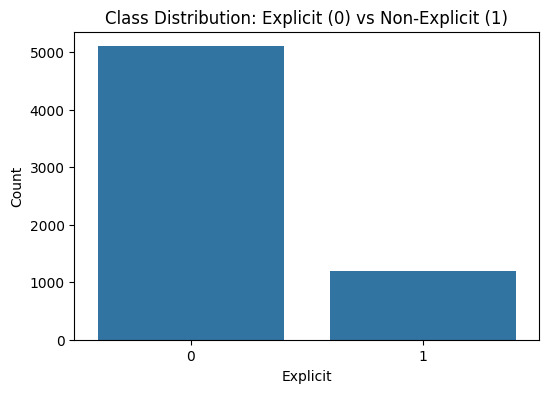

In [13]:
# Class distribution for the target variable (explicit)
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df_selected, legend=False)
plt.title("Class Distribution: Explicit (0) vs Non-Explicit (1)")
plt.xlabel("Explicit")
plt.ylabel("Count")
plt.show()

Correlation Heatmap

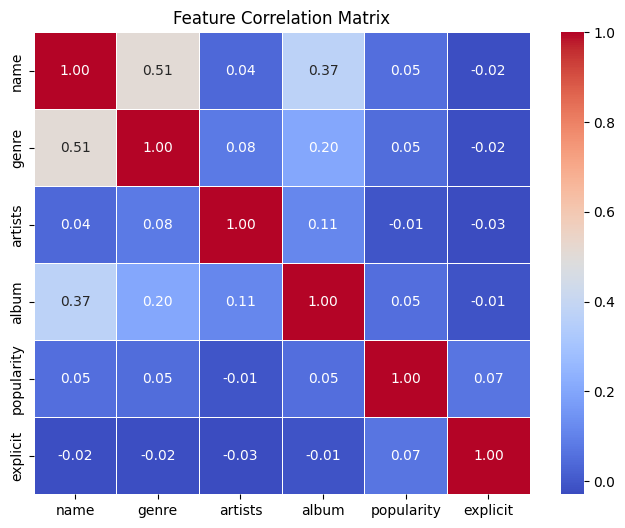

In [ ]:
# Feature correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df_selected.corr()  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Split the data using holdout method (test_train_split)

In [15]:
# Separate features and target
X = df_selected.drop('explicit', axis=1)
y = df_selected['explicit']

# Split the data (80% train, 20% test) using stratified sampling to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f"Training Set X: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Training Set Y: {y_train.shape}, Testing Set: {y_test.shape}")

# Check the distribution of the target variable in both sets
print(f"Class distribution in training set: \n{y_train.value_counts()}")
print(f"Class distribution in testing set: \n{y_test.value_counts()}")


Training Set X: (5036, 5), Testing Set: (1260, 5)
Training Set Y: (5036,), Testing Set: (1260,)
Class distribution in training set: 
explicit
0    4076
1     960
Name: count, dtype: int64
Class distribution in testing set: 
explicit
0    1027
1     233
Name: count, dtype: int64


Train the model

In [16]:
# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Store classification reports
classification_reports = {}

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Store and print classification report
    classification_reports[name] = classification_report(y_test, y_pred, zero_division=1)
    
    print(f"{name} Performance:")
    print(classification_reports[name])
    print("="*50)

# Optionally, print all classification reports again
print("\nAll Models' Classification Reports:")
for name, report in classification_reports.items():
    print(f"\n{name} Classification Report:")
    print(report)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1027
           1       0.22      0.52      0.31       233

    accuracy                           0.56      1260
   macro avg       0.53      0.55      0.49      1260
weighted avg       0.72      0.56      0.61      1260

KNN Performance:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1027
           1       0.34      0.13      0.19       233

    accuracy                           0.79      1260
   macro avg       0.58      0.54      0.53      1260
weighted avg       0.74      0.79      0.75      1260

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1027
           1       0.32      0.36      0.34       233

    accuracy                           0.74      1260
   macro avg       0.59      0.59      0.59      12

Show confusion matrix for the trained model

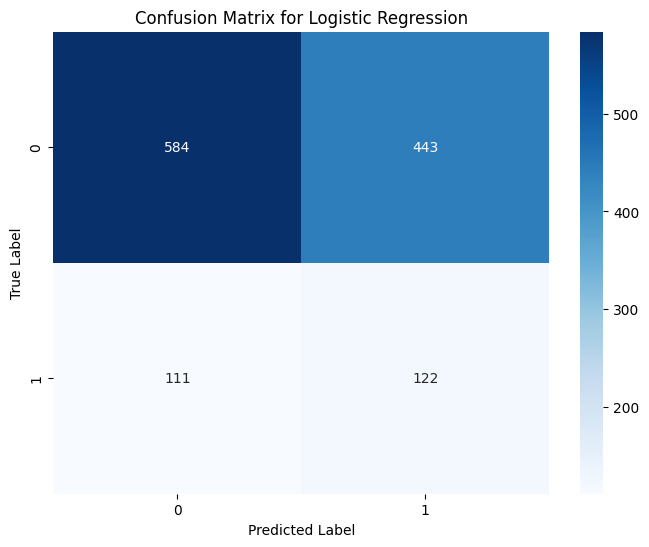

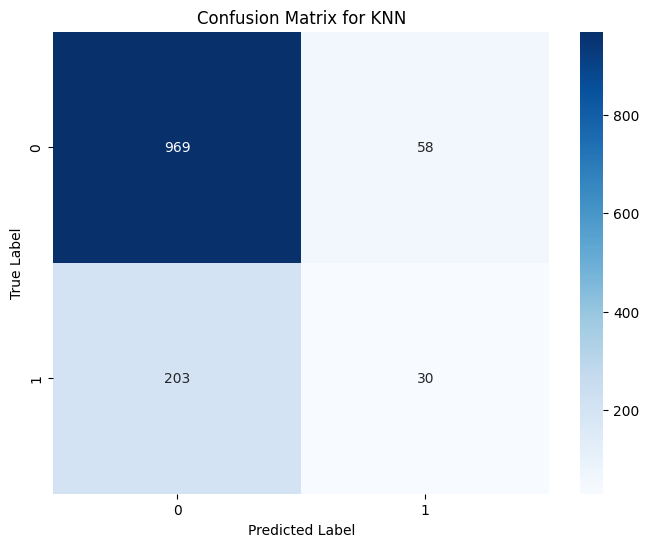

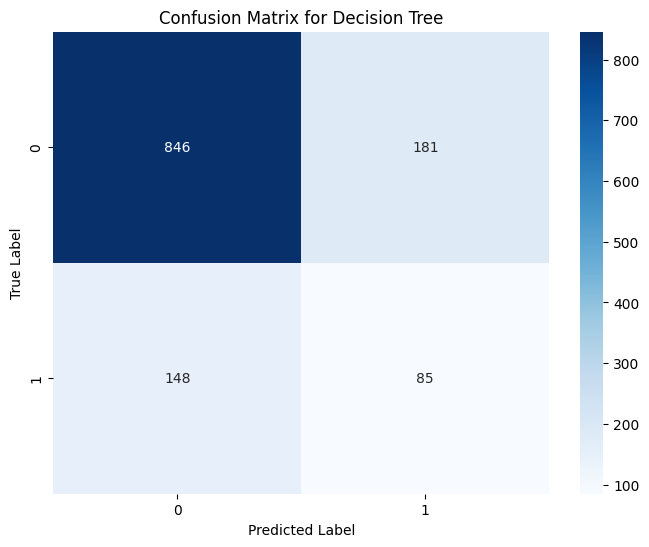

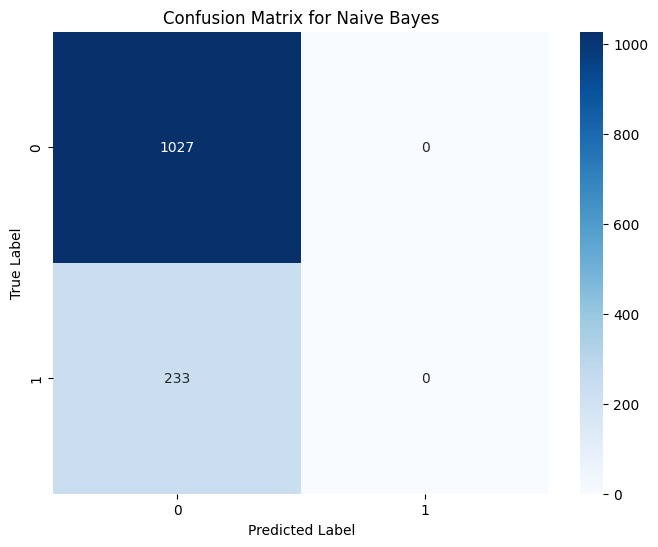

In [17]:
# Loop over each model to plot the confusion matrix
for name, model in models:
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    
    # Add labels and title
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Show plot
    plt.show()

Train additional Sequential Model

In [ ]:
# Build the model
def build_model():
    model = keras.Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model on the entire training set
model = build_model()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=1)
rec = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Show the metrics
print("\n=== Evaluation on Test Set ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")



Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6962 - loss: 76.1993 - val_accuracy: 0.6175 - val_loss: 9.0929
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.6829 - loss: 24.4233 - val_accuracy: 0.8151 - val_loss: 10.3602
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7064 - loss: 12.6684 - val_accuracy: 0.8143 - val_loss: 4.6137
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6913 - loss: 9.5779 - val_accuracy: 0.8095 - val_loss: 4.3508
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.7098 - loss: 6.8800 - val_accuracy: 0.8143 - val_loss: 2.2355
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7020 - loss: 4.9920 - val_accuracy: 0.8008 - val_loss: 1.6479
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7018 - loss: 3.2903 - val_accuracy: 0.6952 - val_loss: 1.3361
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7037 - loss: 2.4543 

Show confusion matrix for Sequential Model

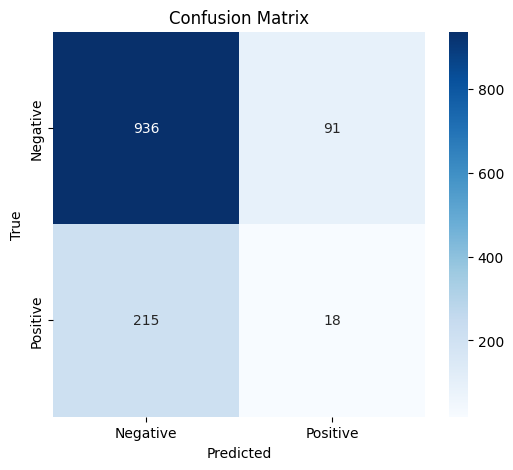

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Create a .h5 file for Sequential Model

In [88]:
# Save the model as .h5
model.save("my_model.h5")
print("Model saved as 'my_model.h5'")

Model saved as 'my_model.h5'


Test the .h5 file using manual input

In [21]:
# Load the saved model
loaded_model = load_model("my_model.h5")

# Example dictionary with the same features as your training data
input_data = {
    'name': ['Italy'],      
    'genre': ['french'],            
    'artists': ['We love barney'],  
    'album': ['Freasdnch'],    
    'popularity': [343]
}

# Convert the dictionary into a DataFrame
input_df = pd.DataFrame(input_data)

# Apply label encoding to categorical features
label_encoder = LabelEncoder()
input_df['name'] = label_encoder.fit_transform(input_df['name'])
input_df['genre'] = label_encoder.fit_transform(input_df['genre'])
input_df['artists'] = label_encoder.fit_transform(input_df['artists'])
input_df['album'] = label_encoder.fit_transform(input_df['album'])

# Ensure numerical column is float
input_df['popularity'] = input_df['popularity'].astype(float)

# Predict using the loaded model (no scaling applied)
y_pred_prob = loaded_model.predict(input_df)

# Get the predicted class based on the threshold (0.5)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Show the prediction and confidence level
print(f"\nPrediction for the single input data: {y_pred_class[0][0]}")
print(f"Confidence level for the prediction: {y_pred_prob[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Prediction for the single input data: 1
Confidence level for the prediction: 1.0000
